In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
# This cell updates result list for images with tumor
data = []
paths = []
result = []

for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
            #print(paths)

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        #print(data)
        result.append(encoder.transform([[0]]).toarray())
        #print(result)

In [4]:
# This cell updates result list for images without tumor
paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result.shape

(139, 1, 2)

In [7]:
result = result.reshape(139,2)
#result

In [8]:
result.shape

(139, 2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, 
                                                 test_size=0.2, 
                                                 shuffle=True,
                                                 stratify=result,
                                                 random_state=0)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(7, 7),  activation ='relu', padding = 'Valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Valid'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

2023-01-29 12:53:20.949255: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      50208     
_________________________________________________________________
batch_normalization (BatchNo (None, 122, 122, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        1

In [11]:
y_train.shape

(111, 2)

In [12]:
cnn=model.fit(x_train, y_train, epochs = 30, 
                    batch_size = 40, verbose = 1,
                    validation_data = (x_test, y_test))

2023-01-29 12:53:21.679170: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
3/3 [==============================] - 10s 3s/step - loss: 19.6568 - accuracy: 0.5225 - val_loss: 74.0883 - val_accuracy: 0.6071
Epoch 2/30
3/3 [==============================] - 8s 3s/step - loss: 10.8007 - accuracy: 0.6306 - val_loss: 20.1048 - val_accuracy: 0.6786
Epoch 3/30
3/3 [==============================] - 8s 3s/step - loss: 5.2452 - accuracy: 0.7568 - val_loss: 44.8726 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 8s 2s/step - loss: 1.8627 - accuracy: 0.8739 - val_loss: 26.1560 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.0851 - accuracy: 0.9009 - val_loss: 21.3767 - val_accuracy: 0.6071
Epoch 6/30
3/3 [==============================] - 8s 3s/step - loss: 0.8630 - accuracy: 0.9369 - val_loss: 20.6210 - val_accuracy: 0.6429
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 0.3212 - accuracy: 0.9369 - val_loss: 13.8516 - val_accuracy: 0.7143
Epoch 8/30
3/3 [===============

In [13]:
model_history = model.history.history

In [14]:
def plot_metrics(model_history):
    
    train_loss = cnn.history['loss']
    val_loss = cnn.history['val_loss']
    train_accuracy = cnn.history['accuracy']
    val_accuracy = cnn.history['val_accuracy']
    
     # Accuracy
    plt.figure()
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    

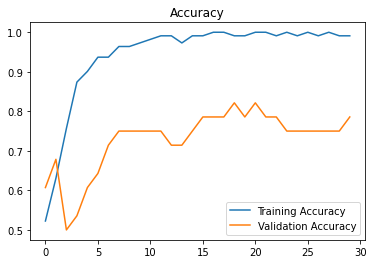

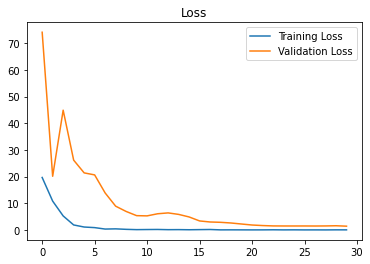

In [15]:
plot_metrics(model_history)

# Steps for reducing overfitting:

* Add more data/Use data augmentation

# Augmentation